In [65]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('headbrain.csv')
print(data)

     Gender  Age Range  Head Size(cm^3)  Brain Weight(grams)
0         1          1             4512                 1530
1         1          1             3738                 1297
2         1          1             4261                 1335
3         1          1             3777                 1282
4         1          1             4177                 1590
..      ...        ...              ...                  ...
232       2          2             3214                 1110
233       2          2             3394                 1215
234       2          2             3233                 1104
235       2          2             3352                 1170
236       2          2             3391                 1120

[237 rows x 4 columns]


In [66]:
type(data['Head Size(cm^3)'])

pandas.core.series.Series

In [67]:
type(data['Head Size(cm^3)'].values)

numpy.ndarray

In [68]:
x = data['Head Size(cm^3)'].values
y = data['Brain Weight(grams)'].values

In [69]:
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
xMean = np.mean(x_train)
yMean = np.mean(y_train)

In [70]:
type(x_train)

numpy.ndarray

In [71]:
b1 = sum((x_train - xMean) * (y_train - yMean)) / sum((x_train - xMean) ** 2)
b1

0.2701648619318752

In [72]:
b0 = yMean - b1 * xMean
b0

302.3202446168898

In [78]:
y_train_pred = b0 + b1 * x_train
rss_train = sum((y_train - y_train_pred) ** 2)
tss_train = sum((y_train - yMean) ** 2)
r2_train = 1 - rss_train / tss_train
rmse_train = np.sqrt(rss_train / len(x_train))
print(r2_train)
print(rmse_train)


0.6594432073670696
69.93989959279556


In [79]:
y_test_pred = b0 + b1 * x_test
rss_test = sum((y_test - y_test_pred) ** 2)
tss_test = sum((y_test - yMean) ** 2)
r2_test = 1 - rss_test / tss_test
rmse_test = np.sqrt(rss_test / len(x_test))
print(r2_test)
print(rmse_test)

0.5595113281138748
80.36387262154912


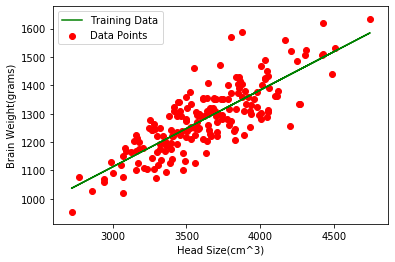

In [80]:
plt.plot(x_train, y_train_pred, color='green', label = 'Training Data')
plt.scatter(x_train, y_train, color='red', label='Data Points')
plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight(grams)')
plt.legend()
plt.show()

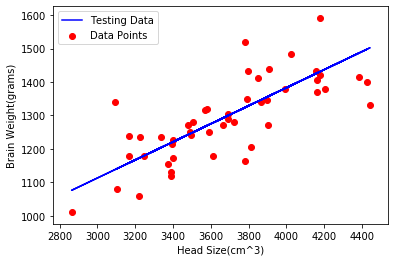

In [76]:
plt.plot(x_test, y_test_pred, color='blue', label = 'Testing Data')
plt.scatter(x_test, y_test, color='red', label='Data Points')
plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight(grams)')
plt.legend()
plt.show()